In [1]:
import pandas as pd

In [21]:
greedindex_df=pd.read_csv("D:\\Downloads\\greed_index_track_2017-2020Apr_finalized.csv", header=None, names =["Date","Greed"], parse_dates=['Date'])

In [28]:
snp_df=pd.read_csv("D:\\Downloads\\^GSPC_2017-2020Apr.csv",parse_dates=['Date'])

In [30]:
dow_df=pd.read_csv("D:\\Downloads\\^DJI_2017-2020Apr.csv",parse_dates=['Date'])

In [24]:
nasdaq_df=pd.read_csv("D:\\Downloads\\^IXIC_2017-2020Apr.csv",parse_dates=['Date'])

In [22]:
greedindex_df.head()

,Date,Greed
0,2017-04-16,40.509307
1,2017-04-11,33.872209
2,2017-04-09,28.736574
3,2017-04-25,53.871692
4,2017-04-20,46.736757


In [25]:
nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-10,5883.430176,5907.850098,5865.560059,5880.930176,5880.930176,1630070000
1,2017-04-11,5871.160156,5878.939941,5819.290039,5866.770020,5866.770020,1821650000
2,2017-04-12,5863.589844,5868.089844,5830.439941,5836.160156,5836.160156,1658960000
3,2017-04-13,5828.370117,5856.540039,5805.149902,5805.149902,5805.149902,1581870000
4,2017-04-17,5821.549805,5856.790039,5818.200195,5856.790039,5856.790039,1381290000


In [32]:
greed_nasdaq=pd.merge(greedindex_df, nasdaq_df[['Date','Close']],left_on="Date",right_on="Date")

In [33]:
greed_nasdaq.head()

,Date,Greed,Close
0,2017-04-11,33.872209,5866.770020
1,2017-04-25,53.871692,6025.490234
2,2017-04-20,46.736757,5916.779785
3,2017-05-03,63.388912,6072.549805
4,2017-05-09,71.586216,6120.589844


In [112]:
greed_nasdaq['Greed_ptchg'] = (greed_nasdaq['Greed'] - greed_nasdaq['Greed'].shift(1))/greed_nasdaq['Greed'].shift(1)

In [119]:
greed_nasdaq['greed_dir'] = greed_nasdaq['Greed_ptchg'] > 0

In [114]:
greed_nasdaq['close_ptchg'] = (greed_nasdaq['Close'] / greed_nasdaq['Close'].shift(1)) - 1

In [121]:
greed_nasdaq['close_dir'] = greed_nasdaq['close_ptchg'] > 0

In [122]:
greed_nasdaq

,Date,Greed,Close,Greed_chg,Greed_ptchg,close_ptchg,greed_dir,close_dir
0,2017-04-11,33.872209,5866.770020,NaN,NaN,NaN,False,False
1,2017-04-25,53.871692,6025.490234,19.999484,0.590439,0.027054,True,True
2,2017-04-20,46.736757,5916.779785,-7.134935,-0.132443,-0.018042,False,False
3,2017-05-03,63.388912,6072.549805,16.652155,0.356297,0.026327,True,True
4,2017-05-09,71.586216,6120.589844,8.197304,0.129318,0.007911,True,True
...,...,...,...,...,...,...,...,...
171,2020-03-10,4.355678,8344.250000,-4.871521,-0.527952,-0.070877,False,False
172,2020-03-06,0.679962,8575.620117,-3.675716,-0.843891,0.027728,False,True
173,2020-03-19,12.072735,7150.580078,11.392773,16.755020,-0.166173,True,False
174,2020-03-20,17.579203,6879.520020,5.506467,0.456108,-0.037907,True,False


In [116]:
greed_nasdaq['Greed_ptchg'].corr(greed_nasdaq['close_ptchg']) 

-0.34724605812103

In [123]:
greed_nasdaq['greed_dir'].corr(greed_nasdaq['close_dir']) 

0.16051379568203875

In [145]:
## look at when greed > 80

dates_extremegreed =greed_nasdaq.query('Greed >=80 ')
print(len(dates_extremegreed))
dates_extremegreed.head()

12


,Date,Greed,Close,Greed_chg,Greed_ptchg,close_ptchg,greed_dir,close_dir
30,2017-09-18,84.104883,6454.640137,26.254879,0.453844,0.009593,True,True
33,2017-10-05,94.777117,6585.359863,23.787400,0.335082,0.029305,True,True
34,2017-10-10,84.820514,6587.250000,-9.956604,-0.105053,0.000287,False,True
38,2017-10-19,89.568890,6605.069824,17.807285,0.248145,-0.014354,True,False
50,2018-01-03,83.493730,7065.529785,22.383460,0.366280,0.016600,True,True


In [146]:
dates_extremegreed['greed_dir'].corr(dates_extremegreed['close_dir']) #some negative correlation on direction

-0.31622776601683794

In [147]:
dates_extremegreed['Greed_ptchg'].corr(dates_extremegreed['close_ptchg'])  #modest negative correlation on pct_change

#make sense, when peak, price first seemed stable

-0.10353799167421536

In [149]:
### check 5-days later, 30-days later, 60-days later, 90-days later


dates_extremegreed =greed_nasdaq.query('Greed >=80 ')
dates_extremegreed.index #Int64Index([30, 33, 34, 38, 50, 51, 152, 155, 156, 159, 161, 162], dtype='int64')
dates_extremegreed.Date

30    2017-09-18
33    2017-10-05
34    2017-10-10
38    2017-10-19
50    2018-01-03
51    2018-01-12
152   2019-10-24
155   2019-11-04
156   2019-11-12
159   2019-12-16
161   2020-01-10
162   2020-01-17
Name: Date, dtype: datetime64[ns]

In [154]:
from pandas.tseries.offsets import DateOffset
five_days_later=dates_extremegreed.Date + DateOffset(days=5) ##

In [192]:
## days of extremegreed
print(greed_nasdaq[greed_nasdaq['Date'].isin(dates_extremegreed.Date)])
extremegreed_close = greed_nasdaq[greed_nasdaq['Date'].isin(dates_extremegreed.Date)][['Date','Greed','Close']]

          Date      Greed        Close  Greed_chg  Greed_ptchg  close_ptchg  \
30  2017-09-18  84.104883  6454.640137  26.254879     0.453844     0.009593   
33  2017-10-05  94.777117  6585.359863  23.787400     0.335082     0.029305   
34  2017-10-10  84.820514  6587.250000  -9.956604    -0.105053     0.000287   
38  2017-10-19  89.568890  6605.069824  17.807285     0.248145    -0.014354   
50  2018-01-03  83.493730  7065.529785  22.383460     0.366280     0.016600   
51  2018-01-12  80.755936  7261.060059  -2.737794    -0.032790     0.027674   
152 2019-10-24  85.338050  8185.799805  27.731293     0.481390     0.004552   
153 2019-10-24  78.466150  8185.799805  -6.871900    -0.080526     0.000000   
155 2019-11-04  92.215407  8433.200195  20.643007     0.288421     0.040583   
156 2019-11-12  84.682942  8486.089844  -7.532465    -0.081683     0.006272   
159 2019-12-16  95.909266  8814.230469  21.647706     0.291506     0.018217   
161 2020-01-10  91.914475  9178.860352  28.083151   

In [180]:
extremegreed_close

,Date,Close
30,2017-09-18,6454.640137
33,2017-10-05,6585.359863
34,2017-10-10,6587.250000
38,2017-10-19,6605.069824
50,2018-01-03,7065.529785
51,2018-01-12,7261.060059
152,2019-10-24,8185.799805
153,2019-10-24,8185.799805
155,2019-11-04,8433.200195
156,2019-11-12,8486.089844


In [168]:
print(nasdaq_df[nasdaq_df['Date'].isin(five_days_later)][['Date','Close']])

extremegreed_5dafter =nasdaq_df[nasdaq_df['Date'].isin(five_days_later)][['Close']]

          Date        Close
127 2017-10-10  6587.250000
137 2017-10-24  6598.430176
188 2018-01-08  7157.390137
194 2018-01-17  7298.279785
643 2019-10-29  8276.849609
696 2020-01-15  9258.700195
700 2020-01-22  9383.769531


In [171]:
pd.concat([extremegreed_close.reset_index(),extremegreed_5dafter.reset_index()],axis=1)
#extremegreed_close

,index,Close,index,Close
0,30,6454.640137,127.0,6587.250000
1,33,6585.359863,137.0,6598.430176
2,34,6587.250000,188.0,7157.390137
3,38,6605.069824,194.0,7298.279785
4,50,7065.529785,643.0,8276.849609
5,51,7261.060059,696.0,9258.700195
6,152,8185.799805,700.0,9383.769531
7,153,8185.799805,NaN,NaN
8,155,8433.200195,NaN,NaN
9,156,8486.089844,NaN,NaN


In [193]:
## umm check 3/5/7/10 records after

three_periods_after =dates_extremegreed.index + 3
greed_nasdaq.loc[three_periods_after]

print(len(extremegreed_close))
print(len(greed_nasdaq.loc[three_periods_after])) #one less

three_periods_later_df=pd.concat([extremegreed_close.reset_index(),greed_nasdaq.loc[three_periods_after][['Date','Greed','Close']].reset_index()],axis=1)
three_periods_later_df

13
12


,index,Date,Greed,Close,index,Date,Greed,Close
0,30,2017-09-18,84.104883,6454.640137,33.0,2017-10-05,94.777117,6585.359863
1,33,2017-10-05,94.777117,6585.359863,36.0,2017-10-27,64.369232,6701.259766
2,34,2017-10-10,84.820514,6587.250000,37.0,2017-10-27,71.761606,6701.259766
3,38,2017-10-19,89.568890,6605.069824,41.0,2017-11-14,52.202298,6737.870117
4,50,2018-01-03,83.493730,7065.529785,53.0,2018-01-29,20.258545,7466.509766
5,51,2018-01-12,80.755936,7261.060059,54.0,2018-01-29,24.751725,7466.509766
6,152,2019-10-24,85.338050,8185.799805,155.0,2019-11-04,92.215407,8433.200195
7,153,2019-10-24,78.466150,8185.799805,158.0,2019-12-06,74.261561,8656.530273
8,155,2019-11-04,92.215407,8433.200195,159.0,2019-12-16,95.909266,8814.230469
9,156,2019-11-12,84.682942,8486.089844,162.0,2020-01-17,85.145160,9388.940430


In [194]:
three_periods_later_df.columns = [i for i in range(8)]



In [197]:
three_periods_later_df['abs_chg'] = three_periods_later_df[7]-three_periods_later_df[3]
three_periods_later_df['pct_chg'] = (three_periods_later_df[7]/three_periods_later_df[3] -1)*100
three_periods_later_df ##all positive results ummm despite extreme greed

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,30,2017-09-18,84.104883,6454.640137,33.0,2017-10-05,94.777117,6585.359863,130.719726,2.025205
1,33,2017-10-05,94.777117,6585.359863,36.0,2017-10-27,64.369232,6701.259766,115.899903,1.759963
2,34,2017-10-10,84.820514,6587.250000,37.0,2017-10-27,71.761606,6701.259766,114.009766,1.730764
3,38,2017-10-19,89.568890,6605.069824,41.0,2017-11-14,52.202298,6737.870117,132.800293,2.010581
4,50,2018-01-03,83.493730,7065.529785,53.0,2018-01-29,20.258545,7466.509766,400.979981,5.675158
5,51,2018-01-12,80.755936,7261.060059,54.0,2018-01-29,24.751725,7466.509766,205.449707,2.829473
6,152,2019-10-24,85.338050,8185.799805,155.0,2019-11-04,92.215407,8433.200195,247.400390,3.022312
7,153,2019-10-24,78.466150,8185.799805,158.0,2019-12-06,74.261561,8656.530273,470.730468,5.750574
8,155,2019-11-04,92.215407,8433.200195,159.0,2019-12-16,95.909266,8814.230469,381.030274,4.518217
9,156,2019-11-12,84.682942,8486.089844,162.0,2020-01-17,85.145160,9388.940430,902.850586,10.639183


In [207]:
## check extreme fear

dates_extremefear =greed_nasdaq.query('Greed <=20 ')
dates_extremefear.index

three_periods_after =dates_extremefear.index + 3
three_periods_after
greed_nasdaq.loc[three_periods_after[:-2]]

extremefear_close = greed_nasdaq[greed_nasdaq['Date'].isin(dates_extremefear.Date)][['Date','Greed','Close']]

# print(len(extremefear_close))
# print(len(greed_nasdaq.loc[three_periods_after])) #one less

three_periods_later_df=pd.concat([extremefear_close.reset_index(),greed_nasdaq.loc[three_periods_after[:-2]][['Date','Greed','Close']].reset_index()],axis=1)
three_periods_later_df.columns = [i for i in range(8)]
three_periods_later_df['abs_chg'] = three_periods_later_df[7]-three_periods_later_df[3]
three_periods_later_df['pct_chg'] = (three_periods_later_df[7]/three_periods_later_df[3] -1)*100
three_periods_later_df

## some big losses, not very reliable indicator, bottom out takes long time than 3 periods

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,25,2017-08-15,14.002061,6333.009766,28.0,2017-09-05,42.451350,6375.569824,42.560058,0.672035
1,58,2018-02-27,12.519184,7330.350098,61.0,2018-03-21,17.961156,7345.290039,14.939941,0.203809
2,61,2018-03-21,17.961156,7345.290039,64.0,2018-04-13,23.167149,7106.649902,-238.640137,-3.248887
3,62,2018-04-10,18.285365,7094.299805,65.0,2018-04-18,31.757495,7295.240234,200.940429,2.832421
4,63,2018-04-05,11.641353,7076.549805,66.0,2018-04-20,36.585057,7146.129883,69.580078,0.983249
5,95,2018-10-12,11.610488,7496.890137,98.0,2018-11-01,8.489321,7434.060059,-62.830078,-0.838082
6,96,2018-10-12,6.598327,7496.890137,99.0,2018-11-09,13.246646,7406.899902,-89.990235,-1.200368
7,97,2018-10-05,18.185041,7788.450195,100.0,2018-11-02,27.999384,7356.990234,-431.459961,-5.539741
8,98,2018-11-01,8.489321,7434.060059,101.0,2018-11-19,8.888912,7028.479980,-405.580079,-5.455701
9,99,2018-11-09,13.246646,7406.899902,102.0,2018-11-27,13.703106,7082.700195,-324.199707,-4.376996


In [212]:
def check_fear_after(fear_threshold, period):
    dates_extremefear =greed_nasdaq.query('Greed <= '+str(fear_threshold))
    dates_extremefear.index

    three_periods_after =dates_extremefear.index + period
    three_periods_after
    greed_nasdaq.loc[three_periods_after[:-(period-1)]]

    extremefear_close = greed_nasdaq[greed_nasdaq['Date'].isin(dates_extremefear.Date)][['Date','Greed','Close']]

    # print(len(extremefear_close))
    # print(len(greed_nasdaq.loc[three_periods_after])) #one less

    three_periods_later_df=pd.concat([extremefear_close.reset_index(),greed_nasdaq.loc[three_periods_after[:-(period-1)]][['Date','Greed','Close']].reset_index()],axis=1)
    three_periods_later_df.columns = [i for i in range(8)]
    three_periods_later_df['abs_chg'] = three_periods_later_df[7]-three_periods_later_df[3]
    three_periods_later_df['pct_chg'] = (three_periods_later_df[7]/three_periods_later_df[3] -1)*100
    
    return three_periods_later_df

check_fear_after(10,5) ## still very bad. bottom-fishing is dangerous?!

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,95,2018-10-12,11.610488,7496.890137,101.0,2018-11-19,8.888912,7028.479980,-468.410157,-6.248060
1,96,2018-10-12,6.598327,7496.890137,103.0,2018-11-27,29.782800,7082.700195,-414.189942,-5.524823
2,98,2018-11-01,8.489321,7434.060059,106.0,2018-12-19,3.227318,6636.830078,-797.229981,-10.724019
3,101,2018-11-19,8.888912,7028.479980,110.0,2019-01-07,31.280981,6823.470215,-205.009765,-2.916844
4,105,2018-12-12,8.099102,7098.310059,NaN,NaT,NaN,NaN,NaN,NaN
5,106,2018-12-19,3.227318,6636.830078,NaN,NaT,NaN,NaN,NaN,NaN
6,170,2020-02-26,9.227198,8980.780273,NaN,NaT,NaN,NaN,NaN,NaN
7,171,2020-03-10,4.355678,8344.250000,NaN,NaT,NaN,NaN,NaN,NaN
8,172,2020-03-06,0.679962,8575.620117,NaN,NaT,NaN,NaN,NaN,NaN


In [216]:
check_fear_after(20,2) # 2 days after shows better result. about half gain, some unchanged, still some severe losses

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,25,2017-08-15,14.002061,6333.009766,27.0,2017-08-31,36.203796,6428.660156,95.650390,1.510346
1,58,2018-02-27,12.519184,7330.350098,60.0,2018-03-06,33.360022,7372.009766,41.659668,0.568318
2,61,2018-03-21,17.961156,7345.290039,63.0,2018-04-05,11.641353,7076.549805,-268.740234,-3.658674
3,62,2018-04-10,18.285365,7094.299805,64.0,2018-04-13,23.167149,7106.649902,12.350097,0.174085
4,63,2018-04-05,11.641353,7076.549805,65.0,2018-04-18,31.757495,7295.240234,218.690429,3.090354
5,95,2018-10-12,11.610488,7496.890137,97.0,2018-10-05,18.185041,7788.450195,291.560058,3.889080
6,96,2018-10-12,6.598327,7496.890137,98.0,2018-11-01,8.489321,7434.060059,-62.830078,-0.838082
7,97,2018-10-05,18.185041,7788.450195,99.0,2018-11-09,13.246646,7406.899902,-381.550293,-4.898924
8,98,2018-11-01,8.489321,7434.060059,100.0,2018-11-02,27.999384,7356.990234,-77.069825,-1.036712
9,99,2018-11-09,13.246646,7406.899902,101.0,2018-11-19,8.888912,7028.479980,-378.419922,-5.109019


In [217]:
check_fear_after(10,2)

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,95,2018-10-12,11.610488,7496.890137,98.0,2018-11-01,8.489321,7434.060059,-62.830078,-0.838082
1,96,2018-10-12,6.598327,7496.890137,100.0,2018-11-02,27.999384,7356.990234,-139.899903,-1.866106
2,98,2018-11-01,8.489321,7434.060059,103.0,2018-11-27,29.782800,7082.700195,-351.359864,-4.726352
3,101,2018-11-19,8.888912,7028.479980,107.0,2018-12-28,11.279187,6584.520020,-443.959960,-6.316586
4,105,2018-12-12,8.099102,7098.310059,108.0,2019-01-10,20.260176,6986.069824,-112.240235,-1.581225
5,106,2018-12-19,3.227318,6636.830078,172.0,2020-03-06,0.679962,8575.620117,1938.790039,29.212591
6,170,2020-02-26,9.227198,8980.780273,173.0,2020-03-19,12.072735,7150.580078,-1830.200195,-20.379078
7,171,2020-03-10,4.355678,8344.250000,NaN,NaT,NaN,NaN,NaN,NaN
8,172,2020-03-06,0.679962,8575.620117,NaN,NaT,NaN,NaN,NaN,NaN


In [220]:
check_fear_after(10,6) # 4 periods or 6 periods after extreme fear still dangerous. probably due to 2018 specific condition

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,95,2018-10-12,11.610488,7496.890137,102.0,2018-11-27,13.703106,7082.700195,-414.189942,-5.524823
1,96,2018-10-12,6.598327,7496.890137,104.0,2018-11-27,26.133100,7082.700195,-414.189942,-5.524823
2,98,2018-11-01,8.489321,7434.060059,107.0,2018-12-28,11.279187,6584.520020,-849.540039,-11.427673
3,101,2018-11-19,8.888912,7028.479980,NaN,NaT,NaN,NaN,NaN,NaN
4,105,2018-12-12,8.099102,7098.310059,NaN,NaT,NaN,NaN,NaN,NaN
5,106,2018-12-19,3.227318,6636.830078,NaN,NaT,NaN,NaN,NaN,NaN
6,170,2020-02-26,9.227198,8980.780273,NaN,NaT,NaN,NaN,NaN,NaN
7,171,2020-03-10,4.355678,8344.250000,NaN,NaT,NaN,NaN,NaN,NaN
8,172,2020-03-06,0.679962,8575.620117,NaN,NaT,NaN,NaN,NaN,NaN


In [222]:
check_fear_after(25,5) # in 2018 there was a prolonged W-shape bottom. sequential effect. mere statistical occurrence won't help

## need data of longer timeframe but cnn greed_index only have 3-yr recent history available

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,20,2017-08-11,20.657911,6256.560059,25.0,2017-08-15,14.002061,6333.009766,76.449707,1.221913
1,25,2017-08-15,14.002061,6333.009766,30.0,2017-09-18,84.104883,6454.640137,121.630371,1.920578
2,53,2018-01-29,20.258545,7466.509766,58.0,2018-02-27,12.519184,7330.350098,-136.159668,-1.823605
3,54,2018-01-29,24.751725,7466.509766,59.0,2018-03-06,37.864794,7372.009766,-94.500000,-1.265652
4,58,2018-02-27,12.519184,7330.350098,63.0,2018-04-05,11.641353,7076.549805,-253.800293,-3.462322
5,61,2018-03-21,17.961156,7345.290039,66.0,2018-04-20,36.585057,7146.129883,-199.160156,-2.711399
6,62,2018-04-10,18.285365,7094.299805,67.0,2018-05-02,43.064548,7100.899902,6.600097,0.093034
7,63,2018-04-05,11.641353,7076.549805,68.0,2018-05-11,55.617420,7402.879883,326.330078,4.611429
8,64,2018-04-13,23.167149,7106.649902,69.0,2018-05-15,49.354787,7351.629883,244.979981,3.447194
9,95,2018-10-12,11.610488,7496.890137,100.0,2018-11-02,27.999384,7356.990234,-139.899903,-1.866106


In [223]:
check_fear_after(25,7) #things are better after 7 periods (1-1.5 months)

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,20,2017-08-11,20.657911,6256.560059,27.0,2017-08-31,36.203796,6428.660156,172.100097,2.750714
1,25,2017-08-15,14.002061,6333.009766,32.0,2017-09-07,70.989717,6397.870117,64.860351,1.024163
2,53,2018-01-29,20.258545,7466.509766,60.0,2018-03-06,33.360022,7372.009766,-94.500000,-1.265652
3,54,2018-01-29,24.751725,7466.509766,61.0,2018-03-21,17.961156,7345.290039,-121.219727,-1.623513
4,58,2018-02-27,12.519184,7330.350098,65.0,2018-04-18,31.757495,7295.240234,-35.109864,-0.478966
5,61,2018-03-21,17.961156,7345.290039,68.0,2018-05-11,55.617420,7402.879883,57.589844,0.784038
6,62,2018-04-10,18.285365,7094.299805,69.0,2018-05-15,49.354787,7351.629883,257.330078,3.627279
7,63,2018-04-05,11.641353,7076.549805,70.0,2018-05-24,42.000037,7424.430176,347.880371,4.915960
8,64,2018-04-13,23.167149,7106.649902,71.0,2018-05-24,35.333278,7424.430176,317.780274,4.471590
9,95,2018-10-12,11.610488,7496.890137,102.0,2018-11-27,13.703106,7082.700195,-414.189942,-5.524823


In [224]:
check_fear_after(25,10) #things are even better after 10 periods (2 months)

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,20,2017-08-11,20.657911,6256.560059,30.0,2017-09-18,84.104883,6454.640137,198.080078,3.165958
1,25,2017-08-15,14.002061,6333.009766,35.0,2017-10-13,76.872375,6605.799805,272.790039,4.307431
2,53,2018-01-29,20.258545,7466.509766,63.0,2018-04-05,11.641353,7076.549805,-389.959961,-5.222788
3,54,2018-01-29,24.751725,7466.509766,64.0,2018-04-13,23.167149,7106.649902,-359.859864,-4.819653
4,58,2018-02-27,12.519184,7330.350098,68.0,2018-05-11,55.617420,7402.879883,72.529785,0.989445
5,61,2018-03-21,17.961156,7345.290039,71.0,2018-05-24,35.333278,7424.430176,79.140137,1.077427
6,62,2018-04-10,18.285365,7094.299805,72.0,2018-05-24,48.159763,7424.430176,330.130371,4.653460
7,63,2018-04-05,11.641353,7076.549805,73.0,2018-05-29,53.256485,7396.589844,320.040039,4.522543
8,64,2018-04-13,23.167149,7106.649902,74.0,2018-06-07,65.493162,7635.069824,528.419922,7.435570
9,95,2018-10-12,11.610488,7496.890137,105.0,2018-12-12,8.099102,7098.310059,-398.580078,-5.316606


In [225]:
check_fear_after(25,13) #good return after 13 periods (2-3 months)

,0,1,2,3,4,5,6,7,abs_chg,pct_chg
0,20,2017-08-11,20.657911,6256.560059,33.0,2017-10-05,94.777117,6585.359863,328.799804,5.255281
1,25,2017-08-15,14.002061,6333.009766,38.0,2017-10-19,89.568890,6605.069824,272.060058,4.295905
2,53,2018-01-29,20.258545,7466.509766,66.0,2018-04-20,36.585057,7146.129883,-320.379883,-4.290892
3,54,2018-01-29,24.751725,7466.509766,67.0,2018-05-02,43.064548,7100.899902,-365.609864,-4.896664
4,58,2018-02-27,12.519184,7330.350098,71.0,2018-05-24,35.333278,7424.430176,94.080078,1.283432
5,61,2018-03-21,17.961156,7345.290039,74.0,2018-06-07,65.493162,7635.069824,289.779785,3.945110
6,62,2018-04-10,18.285365,7094.299805,75.0,2018-06-18,41.358368,7747.029785,652.729980,9.200767
7,63,2018-04-05,11.641353,7076.549805,76.0,2018-06-14,57.501290,7761.040039,684.490234,9.672655
8,64,2018-04-13,23.167149,7106.649902,77.0,2018-06-20,51.403721,7781.509766,674.859864,9.496174
9,95,2018-10-12,11.610488,7496.890137,108.0,2019-01-10,20.260176,6986.069824,-510.820313,-6.813763


In [136]:
## check wider range of extreme greed -- less and modest negative correlation
dates_extremegreed =greed_nasdaq.query('Greed >=70 ')
print(len(dates_extremegreed))
#dates_extremegreed.head()
print(dates_extremegreed['greed_dir'].corr(dates_extremegreed['close_dir']))
print(dates_extremegreed['Greed_ptchg'].corr(dates_extremegreed['close_ptchg'])  )

35
-0.15549416691034376
-0.11251263372140291


In [139]:
## check narrower definition of extreme greed -- less and modest negative correlation
dates_extremegreed =greed_nasdaq.query('Greed >=90 ')
print(len(dates_extremegreed))
#dates_extremegreed.head()
print(dates_extremegreed['greed_dir'].corr(dates_extremegreed['close_dir']))
print(dates_extremegreed['Greed_ptchg'].corr(dates_extremegreed['close_ptchg'])  ) ### wow -- destiny drop

4
nan
-0.8645123369296634


In [129]:
## look at when greed <20
dates_extremefear =greed_nasdaq.query('Greed <=20 ')
dates_extremefear.head()

,Date,Greed,Close,Greed_chg,Greed_ptchg,close_ptchg,greed_dir,close_dir
25,2017-08-15,14.002061,6333.009766,-27.991718,-0.666568,0.008696,False,True
58,2018-02-27,12.519184,7330.350098,-16.126083,-0.562958,-0.009744,False,False
61,2018-03-21,17.961156,7345.290039,-15.398866,-0.461596,-0.003624,False,False
62,2018-04-10,18.285365,7094.299805,0.324210,0.018051,-0.034170,True,False
63,2018-04-05,11.641353,7076.549805,-6.644012,-0.363351,-0.002502,False,False


In [130]:
dates_extremefear['greed_dir'].corr(dates_extremefear['close_dir']) #not obvious correlation on direction

-2.33476426317303e-17

In [132]:
dates_extremefear['Greed_ptchg'].corr(dates_extremefear['close_ptchg']) ## wow notable negative correlation on percentage change

#strong rebound (percentage-wise) likely

-0.6289409526151503

In [143]:
#wider range of extreme fear -- less negative correlation
dates_extremefear =greed_nasdaq.query('Greed <=30 ')
print(len(dates_extremefear))
dates_extremefear.head()
print(dates_extremefear['greed_dir'].corr(dates_extremefear['close_dir']))
print(dates_extremefear['Greed_ptchg'].corr(dates_extremefear['close_ptchg']) )


37
-0.02614881801842456
-0.5632585586441866


In [144]:
#narrower range of extreme fear -- less negative correlation
dates_extremefear =greed_nasdaq.query('Greed <=10 ')
print(len(dates_extremefear))
dates_extremefear.head()
print(dates_extremefear['greed_dir'].corr(dates_extremefear['close_dir']))
print(dates_extremefear['Greed_ptchg'].corr(dates_extremefear['close_ptchg']) ) ## extreme fear days is less indicative of reversal than greed < 20
## only when it bottomed, that things starts to improve meaningfully on percentage

8
nan
-0.39446491474444145


In [35]:
import matplotlib.pyplot as plt

In [ ]:
# reference documentation

# import numpy as np
# import matplotlib.pyplot as plt

# # Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

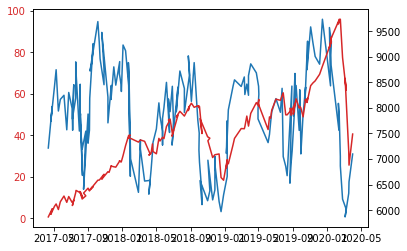

In [104]:
fig, ax1 = plt.subplots()

ax1.plot(greed_nasdaq['Date'],greed_nasdaq['Greed'])
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()

ax2.plot(greed_nasdaq['Date'],greed_nasdaq['Close'], color = 'tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')



In [50]:
import altair as alt

In [52]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [ ]:
#reference

# base = alt.Chart(source).encode(
#         alt.X('year(Year):T')
# )

# line_A = base.mark_line(color='#5276A7').encode(
#     alt.Y('average(Horsepower):Q', axis=alt.Axis(titleColor='#5276A7'))
# )

# line_B = base.mark_line(color='#F18727').encode(
#     alt.Y('average(Miles_per_Gallon):Q', axis=alt.Axis(titleColor='#F18727'))
# )

# alt.layer(line_A, line_B).resolve_scale(y='independent')

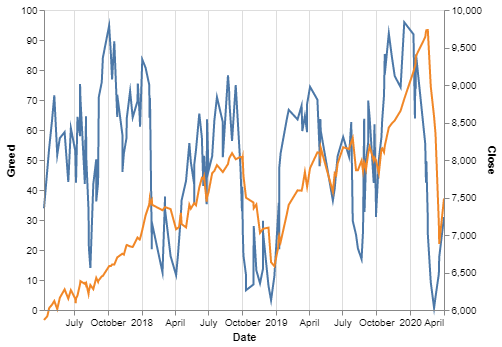

In [90]:
import altair as alt

base = alt.Chart(greed_nasdaq).encode(
    x='Date'
)

line_1 = base.mark_line().encode(
    y='Greed:Q'
)

line_2=base.mark_line(color='#F18727').encode(
    alt.Y('Close:Q', axis=alt.Axis(titleColor='#000000'),
          scale=alt.Scale(domain=(6000, 10000))
))

#chart1 + chart2

alt.layer(line_1, line_2).resolve_scale(y='independent')

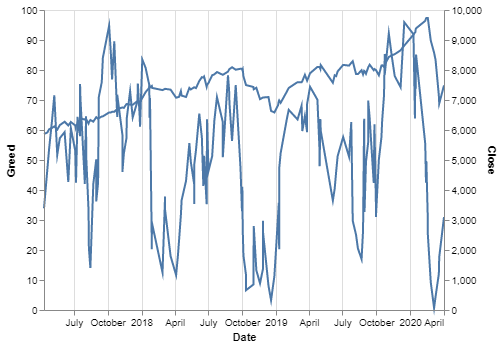

In [79]:
# chart1 = alt.Chart(greed_nasdaq).mark_line().encode(
#     x='Date', y='Greed'
# )

# chart2 = alt.Chart(greed_nasdaq).mark_line().encode(
#     x='Date', y='Close'
# )

# alt.layer(chart1, chart2).resolve_scale(y='independent')

